In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
#create dataframes from data files
test_data = pd.read_csv('test.csv');
train_data = pd.read_csv('train.csv');

In [3]:
# Q1 - First we need to identify our output variable, which is the value that indicates how each record is classified
# based on the other values in the record
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [4]:
# We can see from the above output that the training data set includes the 'Target' column, but 
# the testing data set does not. So, let's see what values this Target column holds.
train_data.Target.unique()

array([4, 2, 3, 1], dtype=int64)

In [5]:
# The limited values for the output variable indicate the learning model will be based on classification.

In [6]:
# Q2 - Understand the type of data
# to understand what kind of data we have, let's explore the training data set
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [7]:
# and also the testing data set
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [8]:
# It looks like we have a mix of data types, and as we saw when we pulled the info for each data set, we know we have
# integers, floats and objects. However, we don't know which columns are which. Let's get that info now.

# Integer columns
print(train_data.select_dtypes(np.int64).columns.values.tolist());

['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 'parentesco2

In [9]:
# Float columns
print(train_data.select_dtypes(np.float64).columns.values.tolist());

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned']


In [10]:
# and Object columns
print(train_data.select_dtypes(np.object).columns.values.tolist());

['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']


In [11]:
# We can also see we have null values in some of the columns, but we'll address those later.

In [12]:
# Q3 - Check to see if there are any biases in our data.
# Since our target variable is an explicit set of values, we will look at how our data is distributed across these values.
# If our train data is not evenly distributed across all target values, the data set is biased.

target_values = train_data.Target.value_counts()
target_values

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

<AxesSubplot:title={'center':'Target Value Distribution'}>

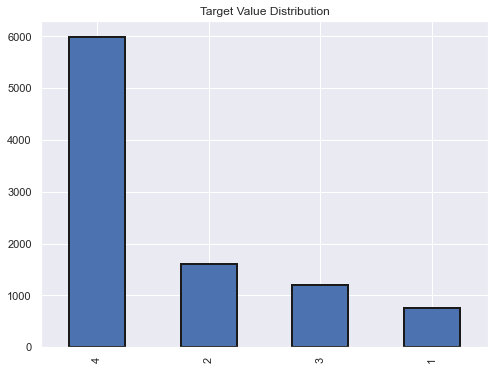

In [13]:
# It appears we may have biased data just from looking at the numbers, but let's look at this visually just to confirm.
target_values.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target Value Distribution")

In [14]:
# We can see how skewed the distribution is across the different target values.
# Data is definitely biased.

In [15]:
# Q4 - Check if all household members have the same poverty level (same Target value).
# First, we'll get the unique household ids.
houses = train_data['idhogar'].unique();
houses

array(['21eb7fcc1', '0e5d7a658', '2c7317ea8', ..., 'a8eeafc29',
       '212db6f6c', 'd6c086aa3'], dtype=object)

In [16]:
# To be more efficient with my code, instead of looping through the houses 3 different times to get the answers
# for the next 3 questions, I have combined the codes for each in the same for loop and commented the section of the loop
# that relates to each question.

# First, we'll create a couple of variables and print them at the end. We'll use these to store a count of affected
# households for the different scenarios.
diff_lvl_count = 0;
house_no_head = 0;
diff_lvl_no_head = 0;

# Q4 - Check if all members of a household have the same poverty level. 
for idhogar in houses:
    min_target = train_data.loc[train_data['idhogar'] == idhogar,'Target'].min();
    max_target = train_data.loc[train_data['idhogar'] == idhogar,'Target'].max();
    hoh_target = train_data.loc[(train_data['idhogar'] == idhogar) & (train_data['parentesco1'] == 1), 'Target'];

    # Q5 - Check if there are any households without a head of household.
    chk = train_data.loc[train_data['idhogar'] == idhogar,'parentesco1'].max();
    if chk < 1:
        # Check if households without heads have differing levels of poverty
        if min_target != max_target:
            diff_lvl_no_head = diff_lvl_no_head + 1;
        house_no_head = house_no_head + 1;
    
    #Q6 - For households with differing levels of poverty, set all members to poverty level of head of household
    if min_target != max_target:
        train_data.loc[(train_data['idhogar'] == idhogar) & (train_data['parentesco1'] != 1), 'Target'] = hoh_target;
        diff_lvl_count = diff_lvl_count +1;


print('Households with members that have differing poverty levels:',diff_lvl_count);
print('Households with no head of household:',house_no_head);
print('Households with members that have differing poverty levels and no head of household:',diff_lvl_no_head);

# Since this data update relates to the Target column (output variable), and does not apply to the test data set,
# we will not make any updates to the test data set at this time.

Households with members that have differing poverty levels: 85
Households with no head of household: 15
Households with members that have differing poverty levels and no head of household: 0


In [17]:
# Q7 - Count how many null values are existing in columns. We need to check both train and test data since test 
# data is just as important as the train data.
# Starting with the train data, we will find the nulls and determine what to do with them: fill or drop.
# Then, we'll do the same with the test data to clean it up as well.

# Object type columns which have null values
null_obj_cols = train_data.select_dtypes('object').isnull().sum();
print ('Train Data Object columns and null value counts: ');
print(null_obj_cols[null_obj_cols > 0]);

# Integer type columns which have null values
null_int_cols = train_data.select_dtypes('int64').isnull().sum();
print ('Train Data Integer columns and null value counts: ');print(null_int_cols[null_int_cols > 0]);

# Float type columns which have null values
null_flt_cols = train_data.select_dtypes('float64').isnull().sum();
print ('Train Data Float columns and null value counts: ');
print(null_flt_cols[null_flt_cols > 0]);

Train Data Object columns and null value counts: 
Series([], dtype: int64)
Train Data Integer columns and null value counts: 
Series([], dtype: int64)
Train Data Float columns and null value counts: 
v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
Target        250
dtype: int64


In [18]:
# Let's explore the columns with null values and determine the best way to handle them.
# First, check the data dictionary to understand what information each column contains.
# v2a1 - Monthly rent payment
# v18q1 - number of tablets household owns
# rez_esc - Years behind in school
# meaneduc - average years of education for adults (18+)
# SQBmeaned - square of the mean years of education of adults (>=18) in the household
# Target - our output variable that indicates poverty level of the household

# Next, let's see if any of these columns correspond with other columns in a way that would explain the null values. This
# will help us decide how to handle them.

In [19]:
# Rows where v2a1 (Monthly rent payment) value is null (NaN) and columns pertaining to home is owned, rented or otherwise
train_data.loc[train_data['v2a1'].isnull(),['v2a1','tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']].max()

v2a1         NaN
tipovivi1    1.0
tipovivi2    0.0
tipovivi3    0.0
tipovivi4    1.0
tipovivi5    1.0
dtype: float64

In [20]:
# From the results, we see that rent is null whenever the home is owned (tipovivi1 = 1), or ownership is 
# precarious (tipovivi1 = 1), or the house is assigned or borrowed (tipovivi1 = 1). So, it's safe to replace these null
# values with 0.
train_data.loc[(train_data['v2a1'].isnull()) & ((train_data['tipovivi1'] == 1) | (train_data['tipovivi4'] == 1) | (train_data['tipovivi5'] ==1)), 'v2a1'] = 0;

#Let's double check to see if we have missed any other scenarios
train_data.loc[train_data['v2a1'].isnull()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


In [21]:
# Second column with null values is v18q1 (number of tablets household owns). Only other column related to tablets is 
# v18q (member of household owns tablet). Since v18q does not have any null values, let's pull both columns for all rows
# where v18q1 is null.

train_data.loc[train_data['v18q1'].isnull(),['v18q1','v18q']].max()

v18q1    NaN
v18q     0.0
dtype: float64

In [22]:
# The results show us that a household member tablet indicator is only null when there are 0 tablets in the household. So,
# it is safe to replace these null values with 0.
train_data.loc[(train_data['v18q1'].isnull()), 'v18q1'] = 0;

#Double check to see if we have missed any other scenarios
train_data.loc[train_data['v18q1'].isnull()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


In [23]:
# The third column with null values is rez_esc (Years behind in school). Since there are many reasons why a person may
# be behind in school, let's take a peek at the raw data where rez_esc is null to check for obvious patterns.

train_data.loc[train_data['rez_esc'].isnull()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4.0
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4.0
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.0000,121.0000,1444,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,0.0,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2.0
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,0.0,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2.0
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,0.0,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2.0
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,0.0,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2.0


In [24]:
# The results vary widely. So, let's see if rez_esc is ever 0.
train_data.loc[train_data['rez_esc'] == 0]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.00,121.00,64,4.0
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,0.0,0,...,0,49,16,81,4,16.000000,1.00,100.00,49,4.0
38,ID_0f01e18e9,80000.0,0,4,0,1,1,0,0.0,0,...,64,225,9,64,1,2.250000,0.25,49.00,225,4.0
42,ID_e3869ade2,0.0,0,8,0,1,1,1,1.0,0,...,64,225,9,0,1,1.000000,4.00,240.25,225,4.0
48,ID_839160e1d,0.0,0,5,0,1,1,1,1.0,0,...,4,64,9,121,1,2.250000,0.25,182.25,64,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,ID_e5c97d1a3,0.0,0,3,0,1,1,0,0.0,0,...,1,64,4,0,1,1.000000,1.00,25.00,64,1.0
9516,ID_9b58089fb,0.0,0,8,0,1,1,1,1.0,0,...,36,144,9,121,1,0.562500,0.25,182.25,144,4.0
9533,ID_5384717d3,70000.0,0,4,0,1,1,0,0.0,0,...,100,289,9,25,1,2.250000,0.25,30.25,289,4.0
9542,ID_fc386a944,0.0,0,3,0,0,0,0,0.0,2,...,9,100,25,4,9,6.250000,2.25,16.00,100,2.0


In [25]:
# There are 1,211 records where the rez_esc value is 0, and again, no obvious patterns. So, let's look at age for null 
# records to see if there seems to be a pattern there.
train_data.loc[train_data['rez_esc'].isnull(),['rez_esc','age']]

,rez_esc,age
0,NaN,43
1,NaN,67
2,NaN,92
4,NaN,37
5,NaN,38
...,...,...
9552,NaN,46
9553,NaN,2
9554,NaN,50
9555,NaN,26


In [26]:
# It seems the records apply to household members who are too young or old to attend primary or secondary. Let's test this
# by looking at the key indicators for age where rez_esc is not null.
train_data.loc[(train_data['rez_esc'].notnull()),'age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [27]:
# When rez_esc is populated, the age range is between 7 and 17. So, let's see how many records we have where rez_esc is 
# null and age is between 7 and 17.
train_data.loc[(train_data['rez_esc'].isnull()) & ((train_data['age'] < 7) | (train_data['age'] > 17)),'age'].describe()

count    7927.000000
mean       38.836887
std        20.988312
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [28]:
# From previous queries, we know there are 7928 records where rez_esc is null. However, the above check only returned 7927.
# We know that these records represent people who are too young or old for primary/secondary school. So, it is logical that
# the rez_esc should be 0 instead of null. Let's go ahead and update these specific records.
train_data.loc[(train_data['rez_esc'].isnull()) & ((train_data['age'] < 7) | (train_data['age'] > 17)),'rez_esc'] = 0;

# Next we'll look at any remaining rows where rez_esc is null -- expecting only 1 record based on previous queries.
train_data.loc[(train_data['rez_esc'].isnull())]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4.0


In [29]:
# As expected only 1 null rez_esc record is left to clean up. Let's look at the age of the person represented in this row,
# and also grab the household id and info about other members as well.
train_data.loc[(train_data['rez_esc'].isnull()),['age','idhogar','hogar_total','hogar_adul','hogar_nin','hogar_mayor']]

,age,idhogar,hogar_total,hogar_adul,hogar_nin,hogar_mayor
2514,10,0369a5d78,3,2,1,0


In [30]:
# Now we know the age of the member is 10, and have the household id and know there are also 2 other members in the house.
# So, we can check those records and pull a bit more info also. Since all of the other records where rez_esc was null
# represented people that aren't in school, it would be logical to infer this person is also not in school. Let's look at
# some other columns that may explain why this 10 year old child is not in school... or if the null value should be 0 also.
train_data.loc[(train_data['idhogar'] == '0369a5d78'),['age','dis','parentesco1','edjefe','edjefa','escolari','Target','v2a1']]

,age,dis,parentesco1,edjefe,edjefa,escolari,Target,v2a1
2512,37,0,0,11,no,16,4.0,160000.0
2513,38,0,1,11,no,11,4.0,160000.0
2514,10,1,0,11,no,0,4.0,160000.0


In [31]:
# The child is disabled. So, this is why they are not in school. We can safely set rez_esc to 0.
train_data.loc[(train_data['rez_esc'].isnull()),'rez_esc'] = 0;

# One last check for null rez_esc values
train_data.loc[(train_data['rez_esc'].isnull())]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


In [32]:
# Moving on to meaneduc (average years of education for adults (18+)). We know there are 5 records with null values for
# this column. We also know we have 5 records where the square of mean education () is null. However, we do not know if
# they are the same 5 records in both cases. Let's check.
train_data.loc[(train_data['meaneduc'].isnull()),['meaneduc','SQBmeaned']]

,meaneduc,SQBmeaned
1291,NaN,NaN
1840,NaN,NaN
1841,NaN,NaN
2049,NaN,NaN
2050,NaN,NaN


In [33]:
# As expected both columns are null on the same 5 records. Next, we'll look at other columns that relate to education to
# see if there is a reason the mean education is null. We know which columns edjefe and edjefa are derived from, so we
# will include those in the data set also.
train_data.loc[(train_data['meaneduc'].isnull()) & (train_data['age'] > 17),['idhogar','hogar_total','meaneduc','SQBmeaned','age','male','female','escolari','parentesco1','edjefe','edjefa']]

,idhogar,hogar_total,meaneduc,SQBmeaned,age,male,female,escolari,parentesco1,edjefe,edjefa
1291,1b31fd159,1,NaN,NaN,18,0,1,10,1,no,10
1840,a874b7ce7,2,NaN,NaN,18,0,1,6,0,4,no
1841,a874b7ce7,2,NaN,NaN,18,1,0,4,1,4,no
2049,faaebf71a,2,NaN,NaN,19,1,0,12,1,12,no
2050,faaebf71a,2,NaN,NaN,19,1,0,12,0,12,no


In [34]:
# Finally, we can clean up meaneduc and SQBmeaned null values. We can see from the above results that we have three unique
# households that have null meaned columns. We can also see that the entire household is represented in the results as well
# since the number of records for each household matches the value in hogar_total (total individuals in the household).
# We will simply calculate the meaneduc value for each of the households. Then, do the same for the squared value.
houses = train_data.loc[(train_data['meaneduc'].isnull()),'idhogar'].unique();

for house in houses:
    # calculate mean education years for each household
    rec_count = train_data.loc[(train_data['idhogar'] == house),'idhogar'].count();
    ed_yrs_house_sum = train_data.loc[(train_data['idhogar'] == house),'escolari'].sum();
    new_meaneduc = ed_yrs_house_sum/rec_count;
    
    # update meaneduc
    train_data.loc[(train_data['idhogar'] == house),'meaneduc'] = new_meaneduc;
    
    # check that meaneduc was populated, square value, and update SQBmeaned
    if new_meaneduc is not None:
        train_data.loc[(train_data['idhogar'] == house),'SQBmeaned'] = new_meaneduc*new_meaneduc;

In [35]:
# Double check the updated households to make sure records are populated as expected
train_data.loc[(train_data['idhogar'].isin(houses)),['idhogar','hogar_total','meaneduc','SQBmeaned','age','male','female','escolari','parentesco1','edjefe','edjefa']]

,idhogar,hogar_total,meaneduc,SQBmeaned,age,male,female,escolari,parentesco1,edjefe,edjefa
1291,1b31fd159,1,10.0,100.0,18,0,1,10,1,no,10
1840,a874b7ce7,2,5.0,25.0,18,0,1,6,0,4,no
1841,a874b7ce7,2,5.0,25.0,18,1,0,4,1,4,no
2049,faaebf71a,2,12.0,144.0,19,1,0,12,1,12,no
2050,faaebf71a,2,12.0,144.0,19,1,0,12,0,12,no


In [36]:
# It is apparent from the results above we have mixed values for edjefe and edjefa, some values are string values and some
# are numeric. So, we need to fix that so the data is consistent. The data dictionary defines the columns as follows:
#   edjefe: (years of education of male head of household, based on the interaction of escolari (years of education), head
#         of household and gender, yes=1 and no=0)
#   edjefa: (years of education of female head of household, based on the interaction of escolari (years of education), head
#         of household and gender, yes=1 and no=0)

# We will set the columns to 0 for 'no' values, and 1 for 'yes' values.
train_data.loc[(train_data['edjefe'] == 'no'),'edjefe'] = 0;
train_data.loc[(train_data['edjefe'] == 'yes'),'edjefe'] = 1;


train_data.loc[(train_data['edjefa'] == 'no'),'edjefa'] = 0;
train_data.loc[(train_data['edjefa'] == 'yes'),'edjefa'] = 1;

In [37]:
# Double check we got everything for edjefe.
print ('Unique values for edjefe: ')
train_data['edjefe'].unique()

Unique values for edjefe: 


array(['10', '12', 0, '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 1, '3', '18', '13', '20'], dtype=object)

In [38]:
# Double check we got everything for edjefa.
print ('Unique values for edjefa: ')
train_data['edjefa'].unique()

Unique values for edjefa: 


array([0, '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 1, '21', '12', '2', '20', '18'], dtype=object)

In [39]:
# Now we can see that there are values other than 0 and 1. We know from previous queries that these values actually
# match the number of years of schooling for the household member. So, it is safe to set these values to 1.
train_data.loc[(train_data['edjefe'].astype('int') > 1),'edjefe'] = 1;
train_data.loc[(train_data['edjefa'].astype('int') > 1),'edjefa'] = 1;

In [40]:
# Finally we'll double check the unique values for edjefe again.
print ('Unique values for edjefe: ')
train_data['edjefe'].unique()

Unique values for edjefe: 


array([1, 0], dtype=object)

In [41]:
# Double check we got everything for edjefa again.
print ('Unique values for edjefa: ')
train_data['edjefa'].unique()

Unique values for edjefa: 


array([0, 1], dtype=object)

In [42]:
# Let's do one last check for columns with mixed values
for column in train_data.columns:
    dtype = pd.api.types.infer_dtype(train_data[column])
    print('column name:',column)
    print(dtype)

column name: Id
string
column name: v2a1
floating
column name: hacdor
integer
column name: rooms
integer
column name: hacapo
integer
column name: v14a
integer
column name: refrig
integer
column name: v18q
integer
column name: v18q1
floating
column name: r4h1
integer
column name: r4h2
integer
column name: r4h3
integer
column name: r4m1
integer
column name: r4m2
integer
column name: r4m3
integer
column name: r4t1
integer
column name: r4t2
integer
column name: r4t3
integer
column name: tamhog
integer
column name: tamviv
integer
column name: escolari
integer
column name: rez_esc
floating
column name: hhsize
integer
column name: paredblolad
integer
column name: paredzocalo
integer
column name: paredpreb
integer
column name: pareddes
integer
column name: paredmad
integer
column name: paredzinc
integer
column name: paredfibras
integer
column name: paredother
integer
column name: pisomoscer
integer
column name: pisocemento
integer
column name: pisoother
integer
column name: pisonatur
integer
c

In [43]:
# The only column still containing string data is the dependency column. Let's see what data it contains.
train_data['dependency'].unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [44]:
# The data is mostly float values, but there are also yes and no values. We need to fix this. So, we will update the 'no'
# values to 0 and the 'yes' values to 1.
train_data.loc[(train_data['dependency'] == 'no'),'dependency'] = 0;
train_data.loc[(train_data['dependency'] == 'yes'),'dependency'] = 1;

# Now that we've taken care of that, let's double check to make sure we have only float values
train_data['dependency'].unique()

array([0, '8', 1, '3', '.5', '.25', '2', '.66666669', '.33333334', '1.5',
       '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4', '1.3333334',
       '2.25', '.22222222', '5', '.83333331', '.80000001', '6', '3.5',
       '1.6666666', '.2857143', '1.75', '.71428573', '.16666667',
       '.60000002'], dtype=object)

In [45]:
# Now, let's take the same steps to clean up our test data.
# Object type columns which have null values
test_null_obj_cols = test_data.select_dtypes('object').isnull().sum();
print ('Test Data Object columns and null value counts: ');
print(test_null_obj_cols[test_null_obj_cols > 0]);

# Integer type columns which have null values
test_null_int_cols = test_data.select_dtypes('int64').isnull().sum();
print ('Test Data Integer columns and null value counts: ');
print(test_null_int_cols[test_null_int_cols > 0]);

# Float type columns which have null values
test_null_flt_cols = test_data.select_dtypes('float64').isnull().sum();
print ('Test Data Float columns and null value counts: ');
print(test_null_flt_cols[test_null_flt_cols > 0]);

Test Data Object columns and null value counts: 
Series([], dtype: int64)
Test Data Integer columns and null value counts: 
Series([], dtype: int64)
Test Data Float columns and null value counts: 
v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64


In [46]:
# Replace null rent values (v2a1) with 0.
test_data.loc[(test_data['v2a1'].isnull()) & ((test_data['tipovivi1'] == 1) | (test_data['tipovivi4'] == 1) | (test_data['tipovivi5'] ==1)), 'v2a1'] = 0;

#Let's double check to see if we have missed any other scenarios
test_data.loc[test_data['v2a1'].isnull()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq


In [47]:
# replace these null v18q1 (number of tablets in household) values with 0.
test_data.loc[(test_data['v18q1'].isnull()), 'v18q1'] = 0;

#Double check to see if we have missed any other scenarios
test_data.loc[test_data['v18q1'].isnull()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq


In [48]:
# Replace null rez_esc records with 0 for people who are not school aged or people who are disabled and unable to attend.

test_data.loc[(test_data['rez_esc'].isnull()) & ((test_data['age'] < 7) | (test_data['age'] > 17) | (test_data['dis'] == 1)),'rez_esc'] = 0;

# Next we'll look at any remaining rows where rez_esc is null -- expecting only 1 record based on previous queries.
test_data.loc[(test_data['rez_esc'].isnull())]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq


In [49]:
# Calculate the meaneduc value for each of the households. Then, do the same for the squared value.

houses = test_data.loc[(test_data['meaneduc'].isnull()),'idhogar'].unique();

for house in houses:
    # calculate mean education years for each household
    rec_count = test_data.loc[(test_data['idhogar'] == house),'idhogar'].count();
    ed_yrs_house_sum = test_data.loc[(test_data['idhogar'] == house),'escolari'].sum();
    new_meaneduc = ed_yrs_house_sum/rec_count;
    
    # update meaneduc
    test_data.loc[(test_data['idhogar'] == house),'meaneduc'] = new_meaneduc;
    
    # check that meaneduc was populated, square value, and update SQBmeaned
    if new_meaneduc is not None:
        test_data.loc[(test_data['idhogar'] == house),'SQBmeaned'] = new_meaneduc*new_meaneduc;
        
# Recheck for null values to make sure all have been resolved
test_data.loc[(test_data['meaneduc'].isnull())]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq


In [50]:
# Clean up mixed data for edjefe and edjefa. Set the columns to 0 for 'no' values, and 1 for 'yes' values.

test_data.loc[(test_data['edjefe'] == 'no'),'edjefe'] = 0;
test_data.loc[(test_data['edjefe'] == 'yes'),'edjefe'] = 1;


test_data.loc[(test_data['edjefa'] == 'no'),'edjefa'] = 0;
test_data.loc[(test_data['edjefa'] == 'yes'),'edjefa'] = 1;

# Double check to make sure no 'yes' or 'no' entries still exist

test_data.loc[(test_data['edjefe'] == 'no') | (test_data['edjefe'] == 'yes') | (test_data['edjefa'] == 'no') | (test_data['edjefa'] == 'yes')]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq


In [51]:
# Update edjefe and edjefa values that are greater than 1.
test_data.loc[(test_data['edjefe'].astype('int') > 1),'edjefe'] = 1;
test_data.loc[(test_data['edjefa'].astype('int') > 1),'edjefa'] = 1;

# Finally we'll double check the unique values for edjefe and edjefa again.
print ('Unique values for edjefe: ',test_data['edjefe'].unique())
print ('Unique values for edjefa: ',test_data['edjefa'].unique())

Unique values for edjefe:  [0 1]
Unique values for edjefa:  [1 0]


In [52]:
# Clean up mixed data for dependency. Set the columns to 0 for 'no' values, and 1 for 'yes' values.
test_data.loc[(test_data['dependency'] == 'no'),'dependency'] = 0;
test_data.loc[(test_data['dependency'] == 'yes'),'dependency'] = 1;

# Now that we've taken care of that, let's double check to make sure we have only float values
test_data['dependency'].unique()

array(['.5', 0, '8', 1, '.25', '2', '.33333334', '.375', '.60000002',
       '1.5', '.2', '.75', '.66666669', '3', '.14285715', '.40000001',
       '.80000001', '1.6666666', '.2857143', '1.25', '2.5', '5',
       '.85714287', '1.3333334', '.16666667', '4', '.125', '.83333331',
       '2.3333333', '7', '1.2', '3.5', '2.25', '3.3333333', '6'],
      dtype=object)

In [53]:
# The last thing we need to do is eliminate columns that provide no real value when creating a training model.
# Columns which have unique IDs or index values can be eliminated, as well as columns which essentially duplicate
# data found in other columns. After reviewing the data dictionary, I was able to classify the following:
# Number of People in household to compare and drop all but one: r4t3, tamviv, hogar_total, tamhog, hhsize
train_data[['r4t3', 'tamviv', 'hogar_total', 'tamhog', 'hhsize']]

,r4t3,tamviv,hogar_total,tamhog,hhsize
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,4,4,4,4,4
4,4,4,4,4,4
...,...,...,...,...,...
9552,5,5,5,5,5
9553,5,5,5,5,5
9554,5,5,5,5,5
9555,5,5,5,5,5


In [54]:
#From the results above, we can see that all of the columns related to number of people in the household or household size
# all contain the exact same data. So, we can drop all but one. Let's keep hogar_total since we used that field previously.

# Let's check the shape before
print(train_data.shape)
print(test_data.shape)

(9557, 143)
(23856, 142)


In [55]:
# select columns to drop
cols_to_drop=['r4t3', 'tamviv', 'tamhog', 'hhsize']

# execute drop
train_data.drop(columns=cols_to_drop,inplace=True)
test_data.drop(columns=cols_to_drop,inplace=True)

# Check shape after to make sure columns were dropped
print(train_data.shape)
print(test_data.shape)

(9557, 139)
(23856, 138)


In [56]:
# Next, we'll drop the id and squared values since they provide no real value as far as training a machine learning model
# is concerned.
# id values: Id, idhogar
# squared values: SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq

cols_to_drop=['Id', 'idhogar', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

# execute drop
train_data.drop(columns=cols_to_drop,inplace=True)
test_data.drop(columns=cols_to_drop,inplace=True)

# Check shape after to make sure columns were dropped
print(train_data.shape)
print(test_data.shape)

(9557, 128)
(23856, 127)


In [57]:
# Q8 - Remove null value rows of the target variable.
# Next, we will check for any records that have a null Target value in our train_data and remove them. We will not need
# to do this step with our test data since our test data does not have the Target column.
# First, get a count of affected rows.
train_data.loc[(train_data['Target'].isnull())]

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
283,60000.0,0,3,0,1,0,0,0.0,0,0,...,1,0,0,0,0,0,1,0,7,NaN
284,60000.0,0,3,0,1,0,0,0.0,0,0,...,1,0,0,0,0,0,1,0,2,NaN
285,0.0,0,3,0,1,1,0,0.0,0,2,...,1,0,0,0,0,0,1,0,18,NaN
286,0.0,0,3,0,1,1,0,0.0,0,2,...,1,0,0,0,0,0,1,0,1,NaN
287,0.0,0,3,0,1,1,0,0.0,0,2,...,1,0,0,0,0,0,1,0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,0.0,0,4,0,1,1,0,0.0,1,1,...,0,0,0,0,0,1,0,1,10,NaN
9536,0.0,0,4,0,1,0,0,0.0,1,1,...,0,0,0,0,0,1,0,1,8,NaN
9537,0.0,0,4,0,1,0,0,0.0,1,1,...,0,0,0,0,0,1,0,1,29,NaN
9538,0.0,0,4,0,1,0,0,0.0,1,1,...,0,0,0,0,0,1,0,1,6,NaN


In [58]:
# Let's remove these rows from our train data set.
train_data = train_data.drop(train_data.loc[(train_data['Target'].isnull())].index)

In [59]:
# And double check that all records where the target value is null has been removed from the data set
train_data.loc[(train_data['Target'].isnull())]

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target


In [60]:
# Q9 - Predict the accuracy using random forest classifier
# We are finally done wrangling and cleaning our data sets. The next step is to create our train and test samples. While
# you may be thinking, "But we already have train and test data sets". Let me explain. When we create a learning model, we
# build it on the training data set using X and Y, where X is the dataframe with all columns except for the target variable
# and Y is the dataframe with only the target variable. Then, the test data set is split off of that to create our X and Y
# for testing the model against. Our test data does not have the target variable. Therefore, we must split our training data
# into training and testing. Only after this is complete, and the learning algorithm prediction score satisfactory, can we
# run our model against the test data to predict the target variable value for each record in the testing data set.

# So, let's split our training data set.
from sklearn.model_selection import train_test_split

# Create separate dataframes. One with all columns except for the target and one with only the target
x = train_data.drop('Target',axis=1)
y = train_data.Target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [61]:
# Now, finally, let's create our learning model using random forest classifier. Random forest model is used because it is
# more accurate than a decision tree model. This is because the random forest classifier uses an ensemble of decision tree
# models and compiles the results from all to generate a more accurate prediction.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the random forest classifier model
classifier = RandomForestClassifier()

# Next we will fit our training data in the random forest classifier. We are saving our learning model so that we can use
# it later against our test data set.
classifier.fit(x_train,y_train)

# Predict the y value for the test data
y_predict = classifier.predict(x_test)

# And calculate the accuracy of our model
accuracy = accuracy_score(y_predict,y_test)

In [62]:
# Let's check the accuracy of our model
accuracy

0.9377013963480129

In [63]:
# Let's do the same with our test data set and see what the predicted target values look like when the model is 
# applied to our test data set
prediction = classifier.predict(test_data)
prediction

array([4., 4., 4., ..., 4., 4., 4.])

In [64]:
# Q10 - Check the accuracy using random forest with cross validation
# Lastly, we will use random forest with cross validation. To explain this concept, think back to how we set up our data
# by splitting the data into train and test data sets for our random forest classification learning model. Random forest
# only splits the data into one single train/test data split. Random forest with cross validation splits the main data set
# into the given number of folds or randomly selected, but equal sized subsets of data. Then, each subset of data is split
# into train/test models. This provides even more accuracy to the predictions. Since our data set is biased, random forest
# with cross validation learning model will most likely provide the greatest accuracy of predictions.
from sklearn.model_selection import KFold,cross_val_score

# We will first use the default number of splits and 10 trees
kfold=KFold(n_splits = 5,shuffle=True,random_state=10)
rf_w_cross_classifier=RandomForestClassifier(random_state=10,n_jobs = -1)
print(cross_val_score(rf_w_cross_classifier,x_train,y_train,cv=kfold,scoring='accuracy'))
rf_w_cross_accuracy=cross_val_score(rf_w_cross_classifier,x_train,y_train,cv=kfold,scoring='accuracy')
rf_w_cross_accuracy

[0.90194762 0.90732035 0.90060443 0.90194762 0.92343855]


array([0.90194762, 0.90732035, 0.90060443, 0.90194762, 0.92343855])

In [65]:
# Let's look at the mean accuracy for the random forest with cross_accuracy
rfwc_10trees_mean_accuracy = rf_w_cross_accuracy.mean()
rfwc_10trees_mean_accuracy

0.9070517125587643

In [66]:
# Our accuracy with the default number of folds is 90.7%
# Let's see if we achieve a higher degree of accuracy with the same number of splits and 100 trees.
kfold=KFold(n_splits = 5,shuffle=True,random_state=100)
rf_w_cross100_classifier=RandomForestClassifier(random_state=100,n_jobs = -1)
print(cross_val_score(rf_w_cross100_classifier,x_train,y_train,cv=kfold,scoring='accuracy'))
rf_w_cross100_accuracy=cross_val_score(rf_w_cross100_classifier,x_train,y_train,cv=kfold,scoring='accuracy')
rf_w_cross100_accuracy

[0.89993284 0.9113499  0.91000672 0.90866353 0.89590329]


array([0.89993284, 0.9113499 , 0.91000672, 0.90866353, 0.89590329])

In [67]:
# Let's look at the mean accuracy for the random forest with cross validation when 100 trees is used
rfwc_100trees_mean_accuracy = rf_w_cross100_accuracy.mean()
rfwc_100trees_mean_accuracy

0.9051712558764271

In [68]:
# Our prediction accuracy dropped when using random forest with cross validation. However, both iterations of testing
# the latter resulted in basically the same accuracy level. However, I believe the similarity between these two is likely
# attributed to the extreme bias in our original data set. I also believe that while the prediction accuracy is slightly
# lower with the cross validation, it is likely closer to the true accuracy due to the cross validation and random nature
# of the record selections.